In [8]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Lecture 20: Interpreting Confidence ##

In [9]:
births = Table.read_table('baby.csv')

In [10]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [11]:
# Bootstrap the sample mean

means = make_array()

for i in np.arange(5000):
    resampled = births.sample()
    new_mean = np.average(resampled.column('Maternal Age'))
    means = np.append(means, new_mean)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

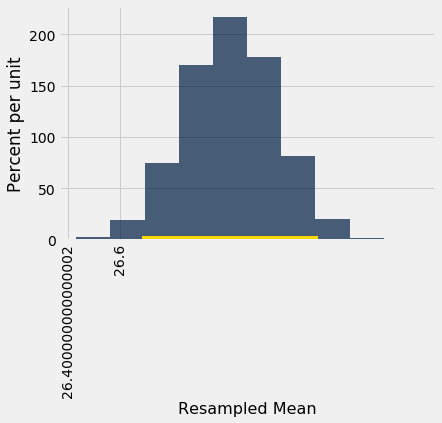

In [15]:
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))
Table().with_column('Resampled Mean', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
plots.xticks([26.6, 26.8])
plots.xticklabels([26.6, 26.8])

print('Approximate 95% Confidence Interval for Mean Maternal Age in Population')
print(np.round(interval_95, 3))